<a href="https://colab.research.google.com/github/dftuil/first/blob/main/%D0%9B%D0%B0%D0%B1%D0%B02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# подключени нужных билиотек
import pandas as pd # для чтения и записи табличных файлов
import numpy as np # для математической обработки данных
import matplotlib.pyplot as plt# для построения графиков




In [ ]:
u = "https://drive.google.com/uc?export=download&id=1XFViS21mLmAnVUqzVsMYgxZUPw6sYn00"
input_df = pd.read_csv(u, index_col = None) 
input_df.head()




,Wind_power_MW,Solar_power_kW,Consumption_MW
0,65.655516,0.0000,34.70
1,69.111069,0.0000,32.79
2,72.134678,178.6368,33.09
3,75.590232,721.5360,33.63
4,68.247181,3752.5248,34.51


In [ ]:
input_df.tail()

,Wind_power_MW,Solar_power_kW,Consumption_MW
8755,128.719366,0.0,45.47
8756,129.583255,0.0,40.72
8757,130.447143,0.0,39.11
8758,132.606864,0.0,36.91
8759,134.766585,0.0,35.58


In [ ]:
input_df.describe()

,Wind_power_MW,Solar_power_kW,Consumption_MW
count,8760.000000,8760.000000,8760.000000
mean,91.842674,1557.825929,31.154526
std,38.617121,2384.385076,8.008808
min,1.295833,0.000000,13.900000
25%,63.927739,0.000000,26.380000
50%,90.708278,0.000000,30.350000
75%,116.624929,2468.332800,36.610000
max,277.740109,8364.211200,56.290000


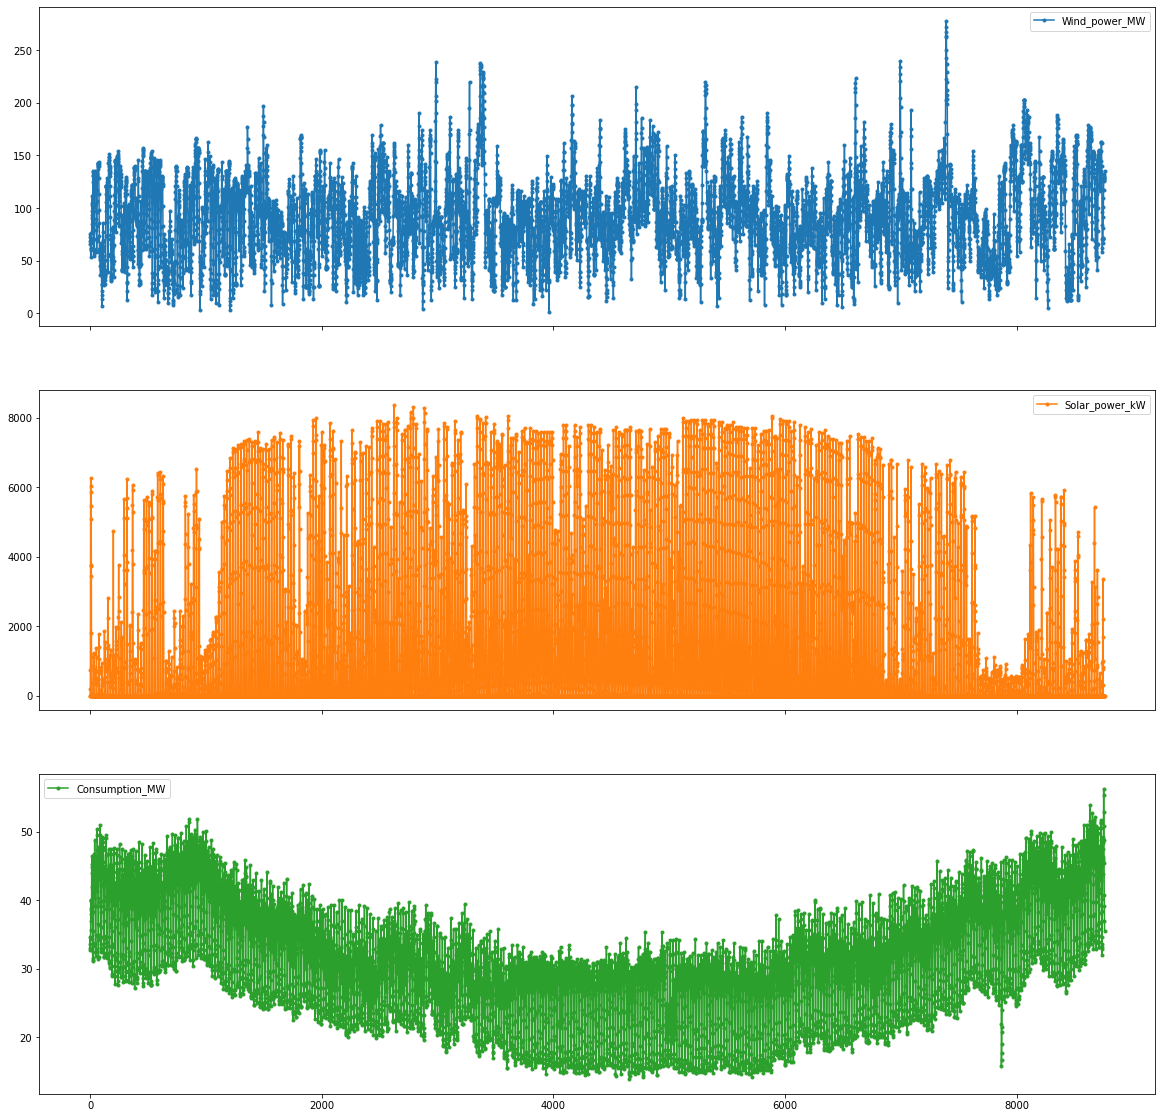

In [ ]:
axes = input_df.plot(marker='.', figsize=(20, 20), subplots = True)

In [ ]:
input_matrix = input_df.values # преврашение таблицы в матрицу
print('размерность матрицы', input_matrix.shape)
E = [] #разницы потребления и выработки активного потребителя
t = [] # время
CV = [] # выработка с двух станций
for i in range(0, 8760):
    wp = input_matrix[i, 0] #  энерги выработанной ветрянной станции
    sp = input_matrix[i, 1] #  энерги выработанной солнечной станции
    cons = input_matrix[i, 2]
    CV.append(wp + sp) # массив выработка с двух станций
    E.append(wp + sp - cons) # массив разницы потребления и выработки активного потребителя
    t.append(i) # время 
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
p = figure(plot_width = 800, plot_height = 400) # Создание объекта для построения графика
output_notebook()
p.line(np.arange(len(t)), E, line_width = 2, color = 'green') # график разницы потребления и выработки активного потребителя
show(p)



размерность матрицы (8760, 3)


In [ ]:
avP = sum(CV)/len(CV) # ср.знач вырабатываемой энергии
Psell = 0 # проданная энергия
for j in range(0, len(CV)):
    if CV[j] > avP: # cравнение выработаной жнергии и необходимой(средне вырабатываемой энергии) 
        Psell = Psell + CV[j] - avP # кол-во энергии нужно продать 
print("Проданное кол-во энергии")
print(Psell, "Дж")


Проданное кол-во энергии
8491948.448760714 Дж
